# Assignment 3: Building Time Series Forecasts

**Student Name:** [Seth Logan]

**Date:** [2/12/2026]

---

## Assignment Overview

In this assignment, you'll analyze temporal data from Corporación Favorita stores to identify trends, seasonality, and anomalies, then build forecasting models using decomposition techniques. You'll work with real retail sales data to predict future sales patterns.

---

## Step 1: Download Data, Import Libraries, and Load Data

The datasets for this analysis are too large too be stored on GitHub. To access the datasets for this assignment, you should:
- Go to the [Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) dataset on Kaggle.
- Click Data 
- Scroll down and select **Download All**.
- Open the zip file and upload `train.csv`, `store.csv`, and `holidays_events.csv` to the `data` directory.

Once the CSV files have been added to the `data` directory, install all the of the necessary libraries for this assignment by running the command below.

In [22]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: C:\Users\sloga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Next, import the required libraries.

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# For time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


Finally, load the training, store, and holiday CSV data from the `data` directory using `pd.read_csv()`. Display basic information about the training data and print out the first few rows to get an understanding of what the training data looks like.

In [24]:
# Load the datasets
# TODO: Load all three required CSV files
train_df = pd.read_csv('data/train.csv')  # Replace with pd.read_csv('data/train.csv')
holidays_df = pd.read_csv('data/holidays_events.csv')  # Replace with pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('data/stores.csv')  # Replace with pd.read_csv('data/stores.csv')

# Display basic information
if train_df is not None:
    print(f"Training data shape: {train_df.shape}")
    print(f"Date range: {train_df['date'].min()} to {train_df['date'].max()}")
    print(f"\nFirst few rows:")
    # TODO: Display the first few rows
    display(train_df.head())

print("\n" + "="*80)
print("CHECKPOINT: Verify datasets loaded correctly")
print(f"Train data shape: {train_df.shape if train_df is not None else 'Not loaded'}")
print(f"Holidays data shape: {holidays_df.shape if holidays_df is not None else 'Not loaded'}")
print(f"Stores data shape: {stores_df.shape if stores_df is not None else 'Not loaded'}")
print("="*80)

Training data shape: (3000888, 6)
Date range: 2013-01-01 to 2017-08-15

First few rows:


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0



CHECKPOINT: Verify datasets loaded correctly
Train data shape: (3000888, 6)
Holidays data shape: (350, 6)
Stores data shape: (54, 5)


### Explore Available Stores and Product Families
Display store information from `stores_df` to help choose a store. Consider looking at store type, cluster, and city

In [25]:
# Explore the data to help choose your store and products
if train_df is not None:
    print("Available stores:")
    print(f"Total number of stores: {train_df['store_nbr'].nunique()}")
    
    print("\nAvailable product families:")
    families = train_df['family'].value_counts().head(20)
    print(families)
    
    # TODO: Display store information from stores_df to help choose a store
    # Consider looking at store type, cluster, and city
    print("\nStore information (first few rows):")
    display(stores_df.head())
    
    print("\nStore types count:")
    print(stores_df['type'].value_counts())
    
    print("\nStore clusters count:")
    print(stores_df['cluster'].value_counts())
    
    print("\nStores by city (top 10):")
    print(stores_df['city'].value_counts().head(10))

Available stores:
Total number of stores: 54

Available product families:
family
AUTOMOTIVE             90936
BABY CARE              90936
BEAUTY                 90936
BEVERAGES              90936
BOOKS                  90936
BREAD/BAKERY           90936
CELEBRATION            90936
CLEANING               90936
DAIRY                  90936
DELI                   90936
EGGS                   90936
FROZEN FOODS           90936
GROCERY I              90936
GROCERY II             90936
HARDWARE               90936
HOME AND KITCHEN I     90936
HOME AND KITCHEN II    90936
HOME APPLIANCES        90936
HOME CARE              90936
LADIESWEAR             90936
Name: count, dtype: int64

Store information (first few rows):


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4



Store types count:
type
D    18
C    15
A     9
B     8
E     4
Name: count, dtype: int64

Store clusters count:
cluster
3     7
10    6
6     6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
2     2
9     2
7     2
12    1
16    1
5     1
17    1
Name: count, dtype: int64

Stores by city (top 10):
city
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Latacunga         2
Machala           2
Manta             2
Ambato            2
Cayambe           1
Riobamba          1
Name: count, dtype: int64


---
## Step 2: Select and Prepare Your Time Series Data

### Select Your Store and Product Families

Choose one store and one product family (PRODUCE, BEVERAGES, BREAD/BAKERY, AUTOMOTIVE, etc.) to analyze.

In [26]:
# TODO: Select your store and product family
selected_store = 2  # Replace with your chosen store number (e.g., 1)
product_family_1 = 'BEVERAGES'  # Replace with the product family you selected (e.g., 'PRODUCE')

print(f"Selected Store: {selected_store}")
print(f"Product Family 1: {product_family_1}")

Selected Store: 2
Product Family 1: BEVERAGES


### Filter Data
Filter the `train_df` data to your selected store and products. Create a date range from 2016-01-01 to 2017-08-15 for consistency.

In [27]:
# TODO: Filter train_df for selected store and date range 2016-01-01 to 2017-08-15

# Convert date column to datetime if needed
if train_df is not None:
    train_df['date'] = pd.to_datetime(train_df['date'])

# Filter for date range
start_date = '2016-01-01'
end_date = '2017-08-15'

# TODO: Create filtered datasets for each product family
product1_data = train_df[
    # Filter for store, product_family_1, and date range
    (train_df['store_nbr'] == selected_store) &
    (train_df['family'] == product_family_1) &
    (train_df['date'] >= start_date) &
    (train_df['date'] <= end_date)
]  


print("\n" + "="*80)
print("CHECKPOINT: Data filtered successfully")
print(f"Product data shape: {product1_data.shape if product1_data is not None else 'Not filtered'}")
print("="*80)


CHECKPOINT: Data filtered successfully
Product data shape: (592, 6)


### Aggregate Daily Sales
Aggregate daily sales and handle missing dates.

In [28]:
# TODO: Group by date and sum sales for each product family
# TODO: Create a complete date range and fill missing dates with 0 sales

# Example structure (replace with your implementation):
# date_range = pd.date_range(start=start_date, end=end_date, freq='D')
# product1_ts = product1_data.groupby('date')['sales'].sum().reindex(date_range, fill_value=0)

product1_ts = 'BEVERAGES'  # Replace with time series for your selected product

product1_daily = product1_data.groupby('date')['sales'].sum()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
product1_ts = product1_daily.reindex(date_range, fill_value=0)

print("\n" + "="*80)
print("CHECKPOINT: Time series created")
print(f"Time series length: {len(product1_ts)}")
print(f"Missing dates filled with 0 sales")
print("="*80)


CHECKPOINT: Time series created
Time series length: 593
Missing dates filled with 0 sales


### Plot Raw Time Series
Plot time series to see the raw patterns using matplotlib.

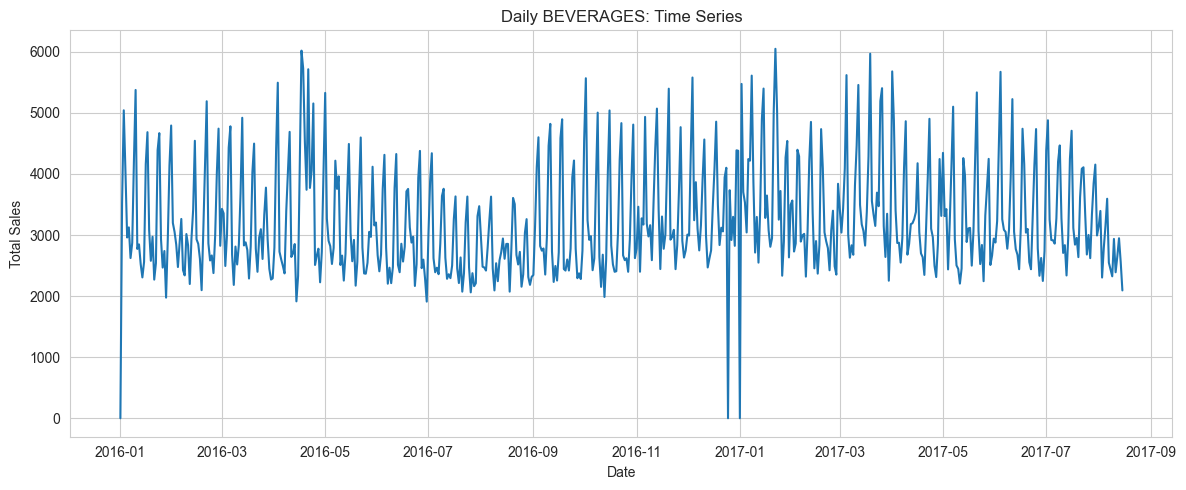

In [29]:
# Plot Product 1
# TODO: Plot product1_ts on a line chart as a time series
plt.figure(figsize=(12, 5))
plt.plot(product1_ts.index, product1_ts.values)
plt.title("Daily BEVERAGES: Time Series")
plt.xlabel("Date")
plt.ylabel("Total Sales")


plt.tight_layout()
plt.show()

### Document Your Choice (2-3 sentences)
Explain why you chose this product. 
- What contrasts do they represent? 
- Why will they be interesting to compare?

[I selected the 'BEVERAGES' product family because of its a high-volume category. Drinks also have a consistent daily demand, making it useful to analyze the long-term sales. Additionally, beverages tend to experience increases as days go on and weekends, when people have the ability to grocery shop. This category provides a strong contrast to more seasonal products, allowing comparisons in forecasting performance.]

---
## Step 3: Identify Trends Using Moving Averages

### Calculate Moving Averages
Calculate the 7-day and 30-day moving averages for the product you are analyzing.

In [30]:
# TODO: Calculate 7-day and 30-day moving averages for your product

# For Product 1
product1_ma7 = product1_ts.rolling(window=7).mean()  # Replace with product1_ts.rolling(window=7).mean()
product1_ma30 = product1_ts.rolling(window=30).mean()  # Replace with product1_ts.rolling(window=30).mean()

### Plot Original Sales
Using matplotlip, plot original sales with both moving averages (7-day and 30-day) overlaid.

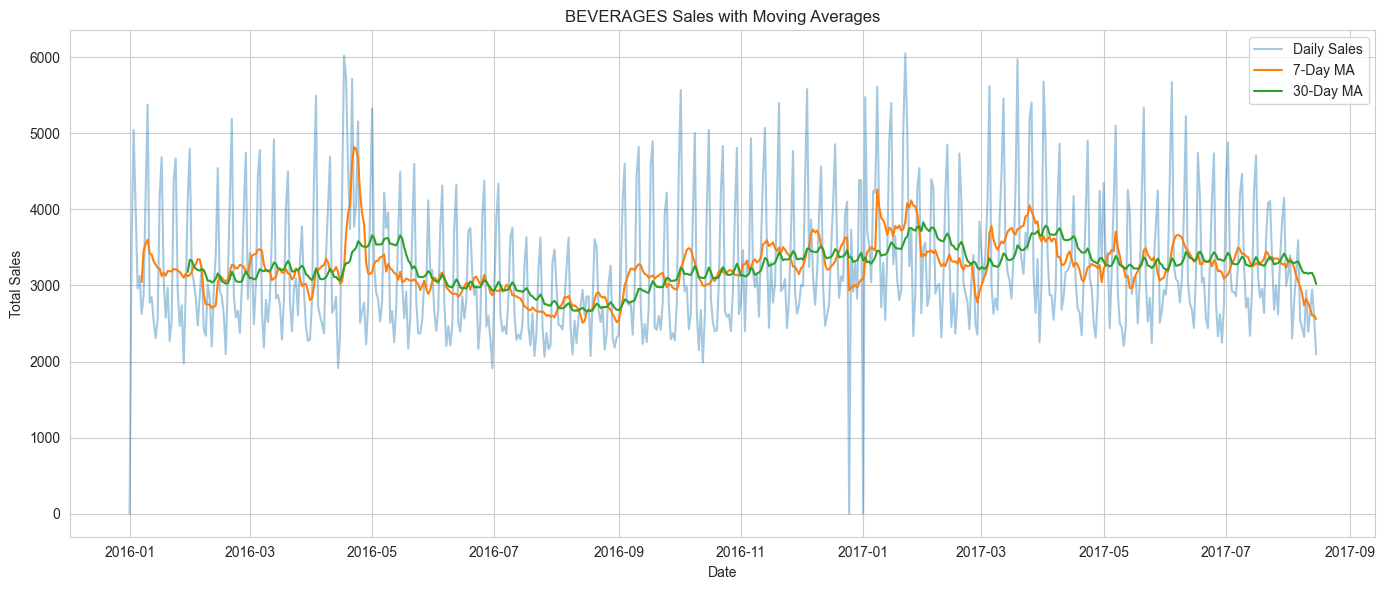

In [31]:
# Plot original sales with moving averages
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Product 1
# TODO: Plot original, 7-day MA, and 30-day MA for product 1
axes.plot(product1_ts.index, product1_ts.values, alpha=0.4, label='Daily Sales')
axes.plot(product1_ma7.index, product1_ma7.values, label='7-Day MA')
axes.plot(product1_ma30.index, product1_ma30.values, label='30-Day MA')
axes.set_title("BEVERAGES Sales with Moving Averages")
axes.set_xlabel("Date")
axes.set_ylabel("Total Sales")
axes.legend()
axes.grid(True)

plt.tight_layout()
plt.show()

### Identify and Explain Trend Changes

Merge the data with `holidays_events.csv` to explain what caused these changes.

In [32]:
# Merge with holidays to explain trend changes
# TODO: Convert holidays_df date to datetime and filter for your date range
if holidays_df is not None:
    holidays_df['date'] = pd.to_datetime(holidays_df['date'])
    relevant_holidays = holidays_df[
        (holidays_df['date'] >= start_date) & 
        (holidays_df['date'] <= end_date)
    ]  # Filter holidays_df for your date range
    
    # TODO: Display holidays that might explain trend changes
    print("Key holidays/events in the period:")
    # Display relevant holidays
    display(relevant_holidays[['date', 'type', 'locale', 'description']].head(20))

Key holidays/events in the period:


,date,type,locale,description
211,2016-01-01,Holiday,National,Primer dia del ano
212,2016-02-08,Holiday,National,Carnaval
213,2016-02-09,Holiday,National,Carnaval
214,2016-03-02,Holiday,Local,Fundacion de Manta
215,2016-03-25,Holiday,National,Viernes Santo
216,2016-04-01,Holiday,Regional,Provincializacion de Cotopaxi
217,2016-04-12,Holiday,Local,Fundacion de Cuenca
218,2016-04-14,Holiday,Local,Cantonizacion de Libertad
219,2016-04-16,Event,National,Terremoto Manabi
220,2016-04-17,Event,National,Terremoto Manabi+1


### Document Trend Analysis
For the product family you are analyzing, document:
1. Overall trend direction (growing, declining, stable)
2. Any trend changes that correlate with holidays or events
3. Business implications of the trends you discovered

Update the markdown cell below with your analysis.

**Product Trends:**
- Overall trend direction: [ Growing/Declining/Stable? ]
- Key trend changes: [ List at least 3 significant changes and dates ]
- Holiday correlations: [ Which holidays affected sales? ]
- Business implications: [ What do these trends mean for inventory ]

The overall trend direction of the 'BEVERAGES' product family remains relatively steady over time, with small upward spikes from late 2016 into early 2017.
A noticeable increase in the 7-day and 30-day moving averages, indicating rising beverage demand through April - June 2016. An increase in the daily sales rapidly rises in the autumn months of 2016.A significant downward trend during August 2017.
Winter holidays show clear spikes in beverage sales, likely due to increased consumption during celebrations. Holidays correlate strongly with temporary increases in beverage demand, as consumers purchase drinks for gatherings and events.
Understanding these trends helps optimize supply chain planning, staffing, and promotional timing, improving profitability and customer satisfaction.

---
## Step 4: Detect and Visualize Seasonal Patterns

Analyze the seasonal components of your sales data.

### Day-of-Week Analysis

Add day of week to your data and calculate the average sales by day. Create a bar plot to visualize the weekday patterns.

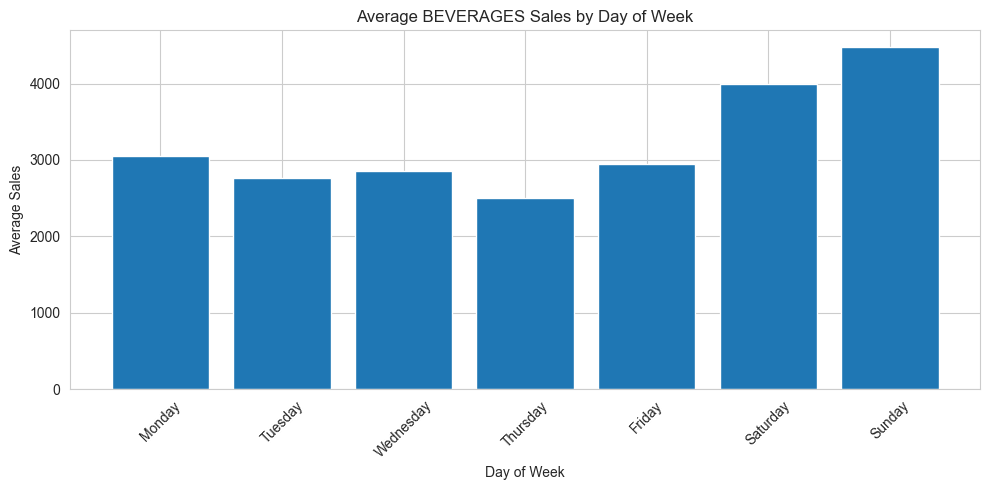

In [33]:
# Analyze day-of-week patterns
# TODO: Add day of week to your data and calculate average sales by day
product1_dow = product1_ts.to_frame(name='sales')  # Create DataFrame with date and sales

# Add day of week: product1_dow['day_of_week'] = product1_dow.index.day_name()
product1_dow['day_of_week'] = product1_dow.index.day_name()
# Group by day of week and calculate mean sales
dow_avg = product1_dow.groupby('day_of_week')['sales'].mean()
# Reorder the chart to flow in week order
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_avg = dow_avg.reindex(dow_order)

# Create bar plot comparing weekday patterns
# TODO: Create bar plot showing average sales by day of week
plt.figure(figsize=(10, 5))
plt.bar(dow_avg.index, dow_avg.values)
plt.title("Average BEVERAGES Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly Seasonality Analysis

Calculate the average sales by month for both products. Once calculated, create a line plot showing monthly patterns for the product.

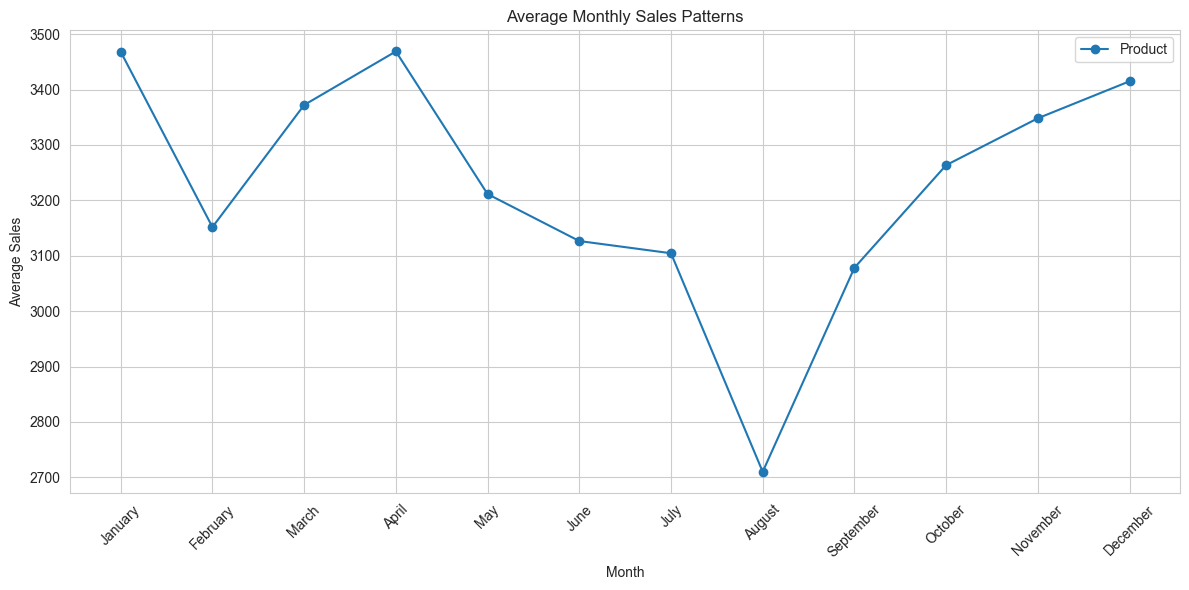

In [34]:
# Analyze monthly patterns
# TODO: Calculate average sales by month for the product.

# For Product 1
product1_monthly = product1_ts.to_frame(name='sales')  # Group by month and calculate mean sales
product1_monthly['month'] = product1_monthly.index.month_name()

monthly_avg1 = product1_monthly.groupby('month')['sales'].mean()

month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
monthly_avg1 = monthly_avg1.reindex(month_order)

# Create visualization

# TODO: Create line plot showing monthly patterns

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg1.index, monthly_avg1.values, marker='o', label='Product')
plt.title("Average Monthly Sales Patterns")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Holiday Impact Analysis

Compare the average sales on holidays compared to regular days.

In [35]:
# Analyze holiday vs non-holiday sales
# TODO: Compare average sales on holidays vs regular days

# Create a list of holiday dates
holiday_dates = holidays_df['date'].unique()  # Extract unique dates from holidays_df
product1_df = product1_ts.to_frame(name='sales')

# Add a holiday flag column
product1_df['is_holiday'] = product1_df.index.isin(holiday_dates)

# Calculate average sales on holidays vs non-holidays for both products
# TODO: Split data into holiday and non-holiday sales and compare
holiday_avg = product1_df[product1_df['is_holiday'] == True]['sales'].mean()
non_holiday_avg = product1_df[product1_df['is_holiday'] == False]['sales'].mean()
print("Average sales on holidays:", holiday_avg)
print("Average sales on non-holidays:", non_holiday_avg)

Average sales on holidays: 3286.1188118811883
Average sales on non-holidays: 3218.741869918699


### Seasonal Pattern Findings

**Document your findings:**
- Which days of the week have highest/lowest sales?
- Are there monthly patterns (e.g., payday effects)?
- How do holidays affect each product differently?
- What business decisions could these patterns inform?

Update the markdown cell below with your analysis.

[Sales tend to be the highest on the weekend days(Friday-Sunday), with the lowest sales coming in the middle days (Tuesday-Thursday).
Monthly patterns show higher sales near the ends of months, which may be linked to when people get paid and have more income to spend.
Sales typically increase during holidays times, likely due to gatherings, parties, and celebrations.
These patterns should inform businesses to increase stock before weekends, holidays, and high-demand months to avoid stockouts.]

---
## Step 5: Build Simple Forecasts and Compare Methods

### Time Series Decomposition

In [36]:
# Perform seasonal decomposition
# TODO: Use seasonal_decompose to separate trend, seasonal, and residual components

# For Product 1
decomposition1 = seasonal_decompose(product1_ts, model='additive', period=7)

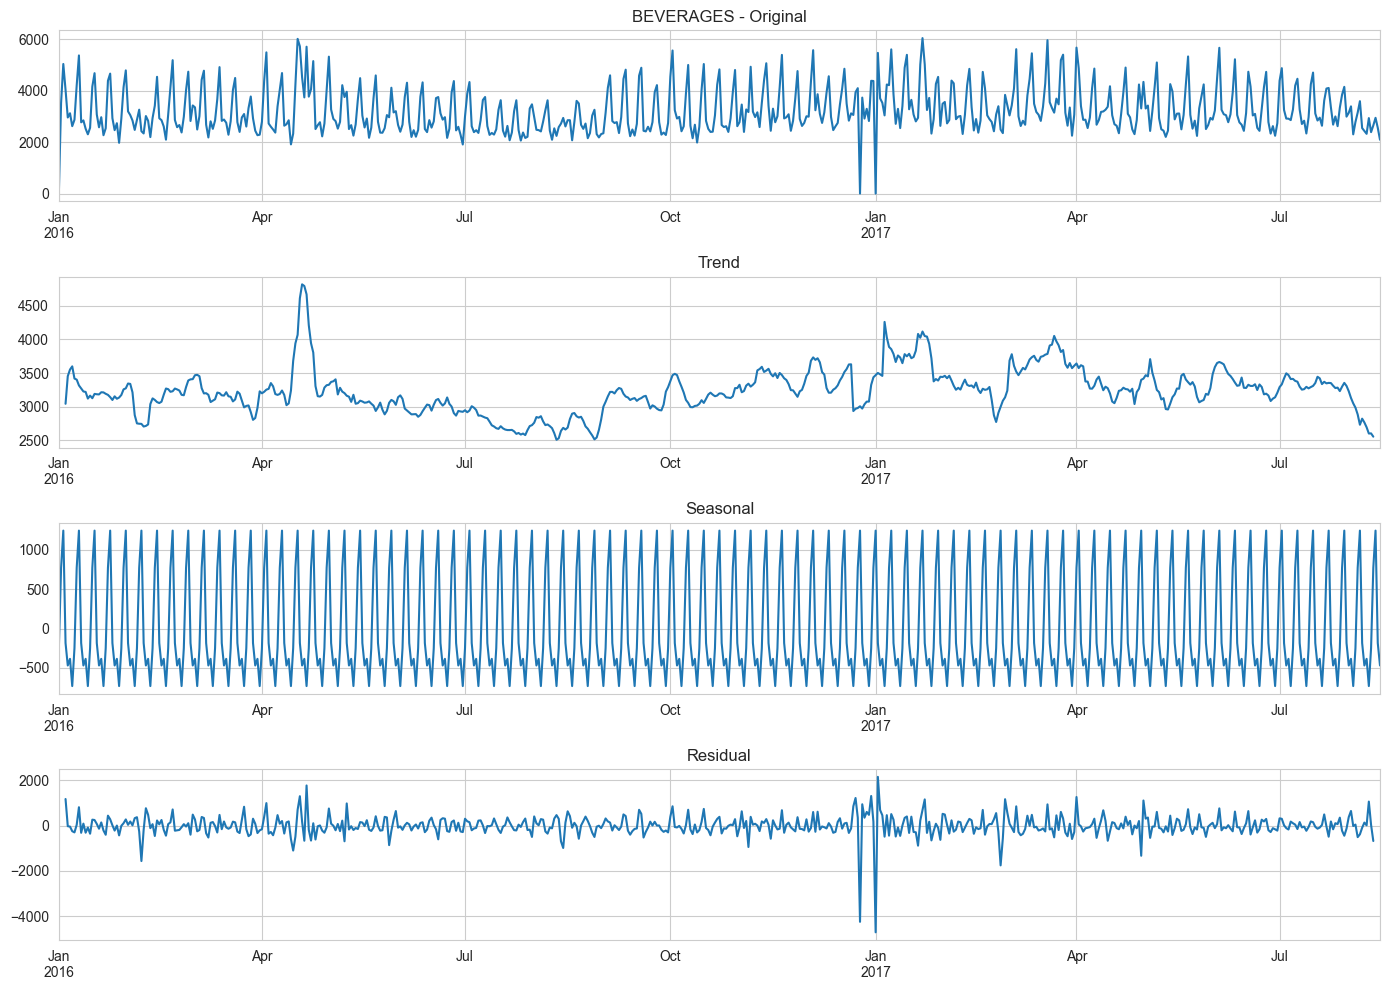

In [37]:
# Visualize decomposition for Product 1
if decomposition1 is not None:
    fig, axes = plt.subplots(4, 1, figsize=(14, 10))
    
    # TODO: Plot each component
    decomposition1.observed.plot(ax=axes[0], title=f'{product_family_1} - Original')
    decomposition1.trend.plot(ax=axes[1], title='Trend')
    decomposition1.seasonal.plot(ax=axes[2], title='Seasonal')
    decomposition1.resid.plot(ax=axes[3], title='Residual')
    
    plt.tight_layout()
    plt.show()

### Build Forecasts
Create a baseline forecast using the average of the last 30 days and a season naive forcast by repeating the last 7 days' pattern.

In [38]:
# Split data for validation
test_days = 30
train = product1_ts[:-test_days]
test = product1_ts[-test_days:]

# Method 1: Baseline forecast (30-day average)
baseline_forecast = np.repeat(train[-30:].mean(), test_days)

# Method 2: Seasonal Naive
# Just repeat the last 7 days pattern
last_week = train[-7:].values
seasonal_naive_forecast = np.tile(last_week, int(np.ceil(test_days/7)))[:test_days]

### Calculate Forecast Accuracy

In [39]:
# Calculate RMSE for both methods
# TODO: Calculate RMSE for baseline and seasonal forecasts

# Product 1
baseline_rmse = np.sqrt(mean_squared_error(test, baseline_forecast))
seasonal_rmse = np.sqrt(mean_squared_error(test, seasonal_naive_forecast))

In [40]:
# Create comparison table
comparison_data = {
    'Method': ['30-Day Average', 'Seasonal Naive (7-day repeat)'],
    'RMSE': [baseline_rmse, seasonal_rmse],
}

comparison_df = pd.DataFrame(comparison_data)

# TODO: Calculate percentage improvement
# Add improvement column to comparison_df
comparison_df['% Improvement vs Baseline'] = (
    (baseline_rmse - comparison_df['RMSE']) / baseline_rmse * 100
)

print("\n" + "="*80)
print("FORECAST PERFORMANCE COMPARISON")
print(comparison_df)
print("="*80)
# TODO: Display comparison table


print("="*80)


FORECAST PERFORMANCE COMPARISON
                          Method        RMSE  % Improvement vs Baseline
0                 30-Day Average  652.965234                   0.000000
1  Seasonal Naive (7-day repeat)  654.030580                  -0.163155


### Visualize Forecasts

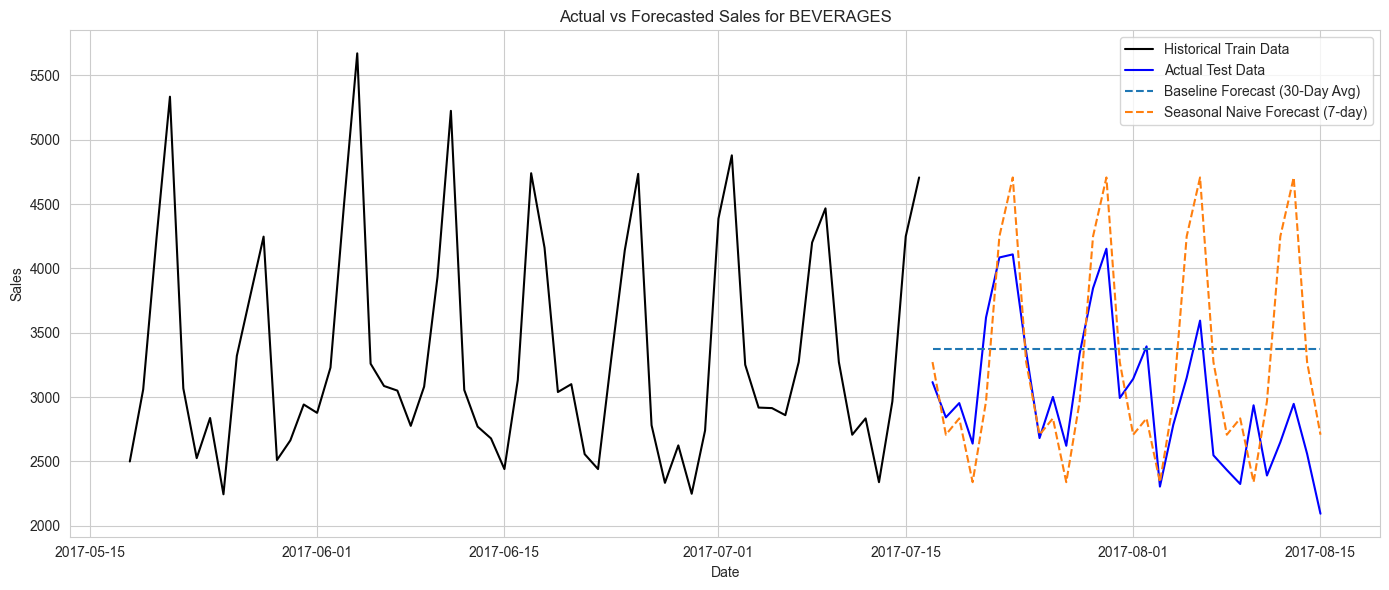

In [41]:
# Plot actual vs forecasted values
# TODO: Create visualization showing:
# - Historical data (last 60 days of train)
# - Actual test data
# - Baseline forecast
# - Seasonal naive forecast

plt.figure(figsize=(14, 6))

train_last60 = train[-60:]
plt.plot(train_last60.index, train_last60.values, label='Historical Train Data', color='black')

# TODO: Plot on this single figure
plt.plot(test.index, test.values, label='Actual Test Data', color='blue')

plt.plot(test.index, baseline_forecast, label='Baseline Forecast (30-Day Avg)', linestyle='--')

plt.plot(test.index, seasonal_naive_forecast, label='Seasonal Naive Forecast (7-day)', linestyle='--')

plt.title(f'Actual vs Forecasted Sales for {product_family_1}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

---
## Step 6: Generate Business Recommendations

### Executive Summary (200-300 words)

Based on your analysis, write a brief executive summary that includes:
- **Key Patterns Discovered:** Summarize the main trends and seasonal patterns for each product
- **Inventory Planning Recommendations:** Specific recommendations based on your findings
- **High-Risk Periods:** Identify periods requiring special attention
- **Predictability Analysis:** Which product is more predictable and why?
- **Specific Action Item:** One concrete action the store manager should take based on your forecast

[This analysis examined daily sales trends and seasonal patterns for the 'BEVERAGES' product family. The data shows a generally stable to slightly growing long-term trend, with strong weekly seasonality where sales are highest on weekends and lower on midweek days. Monthly patterns indicate stable sales during summer months and year-end periods, suggesting seasonal demand spikes likely driven by holidays and purchasing behavior. Holiday analysis shows moderately noticeable sales increases around major holidays, reaffirming the idea that special events significantly influence beverage demand. Based on these findings, inventory should account for predictable weekly and seasonal fluctuations. The 'BEVERAGES' category is relatively predictable compared to more perishable or seasonal products because demand is consistent and exhibits clear recurring patterns, making time-series forecasting models effective. A specific action item for the store manager is to implement a dynamic schedule that increases beverage inventory before weekends and holidays, using the seasonal naive forecast model.]

---
## Step 7: Submit Your Work

Before submitting:
1. Ensure all code cells run without errors
2. Verify all visualizations display correctly
3. Check that your analysis sections are complete
4. Review your executive summary

Push to GitHub:
```bash
git add .
git commit -m 'completed time series forecasting assignment'
git push
```

Submit your GitHub repository link on the course platform.